In [34]:
#!pip install numpy
#!pip install pandas

In [35]:
import numpy as np # import library numpy, store as np
import pandas as pd 

n = 7              # number of observations is 7
S = 1000           # number of simulations is 1000

x = np.random.randint(size=(S, n), low=1, high=7)
print("shape of x:", x.shape)
print("unique values in x:", np.unique(x))

shape of x: (1000, 7)
unique values in x: [1 2 3 4 5 6]


In [36]:
x

array([[1, 6, 2, ..., 6, 3, 2],
       [6, 4, 4, ..., 4, 6, 6],
       [6, 3, 3, ..., 3, 1, 5],
       ...,
       [5, 3, 5, ..., 1, 5, 5],
       [2, 5, 4, ..., 4, 4, 1],
       [3, 4, 1, ..., 1, 5, 3]])

In [37]:
print("one row:", x[0])    
print("one value:", x[0, 4])

one row: [1 6 2 6 6 3 2]
one value: 6


In [38]:
print("one row:", x[-1])
print("one value:", x[-1, -1])

one row: [3 4 1 1 1 5 3]
one value: 3


In [39]:
print("object method:", x[0].mean(), "function:", np.mean(x[0]))

object method: 3.7142857142857144 function: 3.7142857142857144


In [40]:
temp = x.mean(axis=0)  # axis=0 is the direction --> column direction --> calculate mean for each column
print("x.mean(axis=0)   :", temp)
print("temp.mean(0)[3]  :", temp[3]) # extract the 4th element in the column mean array
print("temp[:,3].mean() :", x[:,3].mean())

x.mean(axis=0)   : [3.509 3.597 3.435 3.485 3.483 3.553 3.441]
temp.mean(0)[3]  : 3.485
temp[:,3].mean() : 3.485


In [41]:
xmean = x.mean(axis=1)
# print("xmean:", xmean)

In [42]:
#!pip install matplotlib 
#!pip install seaborn

In [43]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize

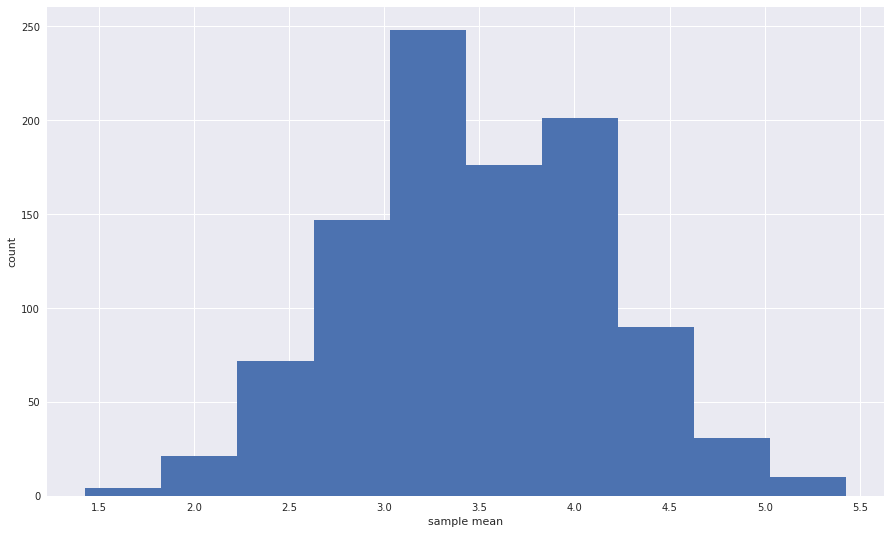

In [44]:
figsize(15, 9)
plt.hist(xmean);
plt.xlabel('sample mean');
plt.ylabel('count');

In [45]:
## throw dice
def throw_dice(n=1):
    
    from numpy.random import randint
    
    return(randint(size=n, low=1, high=7))

## throw dice n times, compute mean
def muhat_n(n=1):
    
    return(throw_dice(n).mean())

In [46]:
n_choices = np.arange(20, 10001, 10) # create a sequence of n, min=20, max=10001, with increment of 10

results = [] # create an empty list
for n in n_choices:
    results += [muhat_n(n)] ## appends to list
# create a data frame; first column is n throws; second column is muhat_n
df = pd.DataFrame({
    'n_throws': n_choices,
    'muhat_n' : results,
})
df[:10] # display the first 10 rows

,muhat_n,n_throws
0,4.000000,20
1,3.400000,30
2,3.200000,40
3,3.700000,50
4,3.133333,60
5,3.528571,70
6,3.500000,80
7,3.811111,90
8,3.860000,100
9,3.300000,110


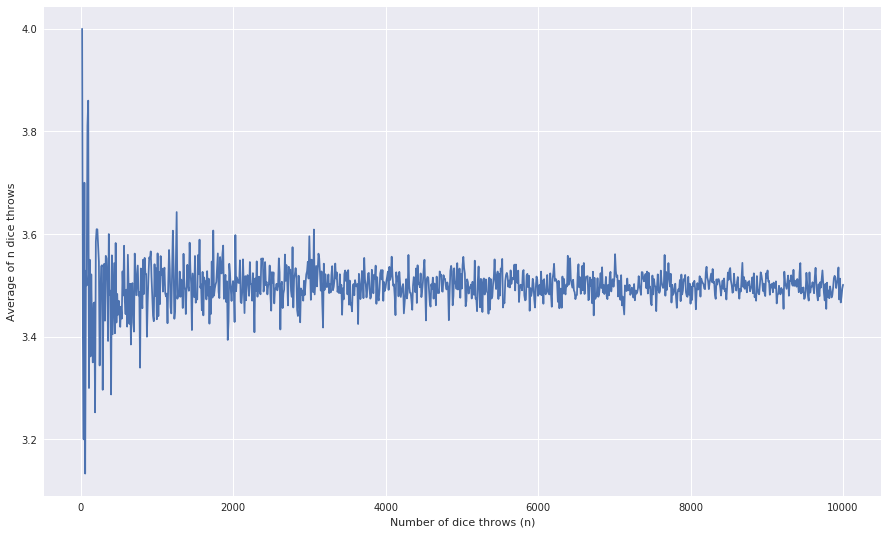

In [47]:
figsize(15, 9)
plt.plot(df['n_throws'], df['muhat_n']);
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

In [48]:
epsilon_n = np.sqrt(2.917/(0.05*n_choices))
df['epsilon'] = epsilon_n

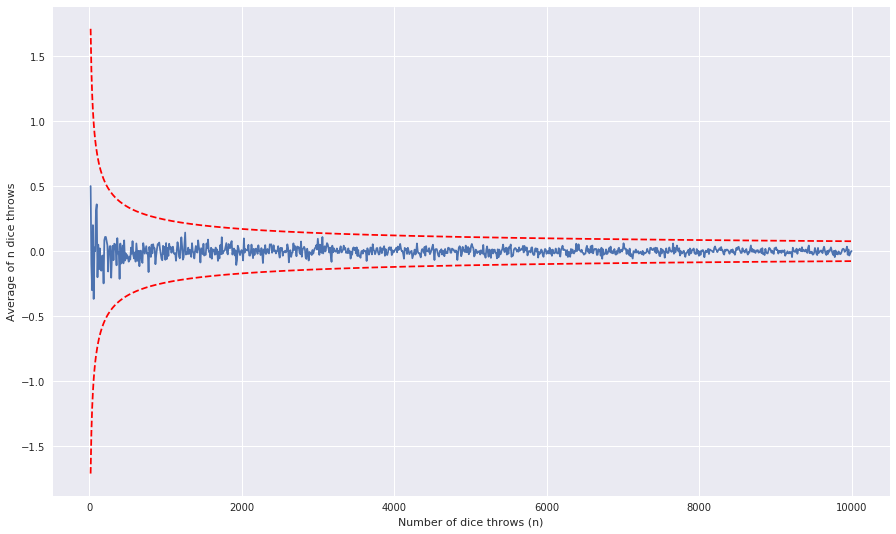

In [49]:
figsize(15, 9)
plt.plot((df['n_throws']),  df['muhat_n']-3.5);    ## subtract true mean 3.5
plt.plot((df['n_throws']),  df['epsilon'], '--r'); # dashed line with red color; 95% upper bound
plt.plot((df['n_throws']), -df['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

In [50]:
## repeat computing mean of n throws s times
def repeat_muhat_n(n=1, s=100): # default value of n is 1, s is 100
    
    out = [muhat_n(n) for one in range(s)]
    # execute muhat_n function s times;
    
    return({ 'min': min(out), 'max': max(out), 'mean': sum(out)/s})

In [51]:
repeat_muhat_n(10) # throw a dice 10 times; repeat this procedure 100 times; each time compute muhat

{'max': 4.8, 'mean': 3.5680000000000005, 'min': 2.0}

In [52]:
results = []
for n in n_choices:
    results += [repeat_muhat_n(n)] ## appends to list

df_new = pd.DataFrame(results) # create data frame from results
df_new['n_throws'] = n_choices # add new column into df--> n_throws
df_new['epsilon'] = epsilon_n # add epsilon
df_new[:10]

,max,mean,min,n_throws,epsilon
0,4.400000,3.550000,2.050000,20,1.707923
1,4.466667,3.581333,2.833333,30,1.394513
2,4.000000,3.474250,2.775000,40,1.207684
3,4.040000,3.497200,2.820000,50,1.080185
4,4.100000,3.524667,3.016667,60,0.986070
5,4.014286,3.498000,3.085714,70,0.912923
6,3.887500,3.504375,3.062500,80,0.853961
7,3.911111,3.493556,3.122222,90,0.805122
8,3.970000,3.495400,3.060000,100,0.763806
9,3.900000,3.529636,3.136364,110,0.728261


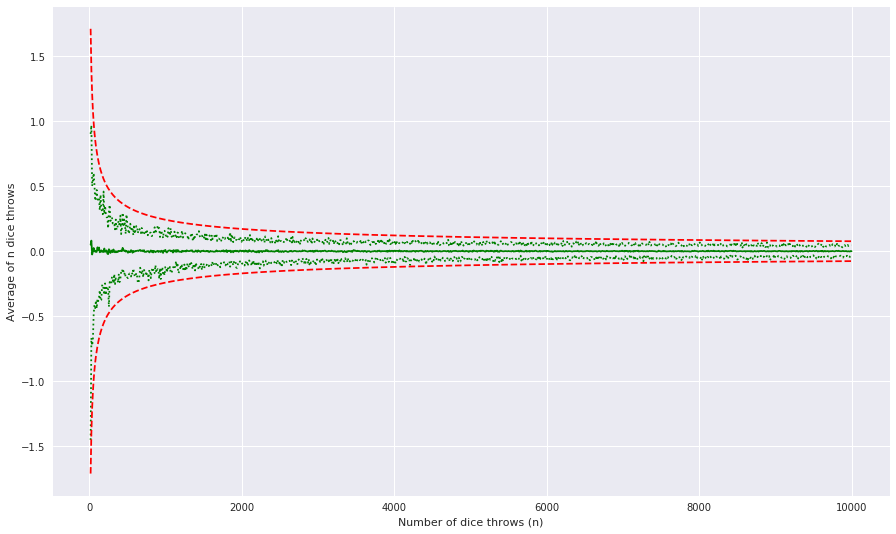

In [53]:
figsize(15, 9)
plt.plot((df_new['n_throws']),  df_new['mean']-3.5, '-g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['min'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['max'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['epsilon'], '--r');
plt.plot((df_new['n_throws']), -df_new['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");